## Importing Libraries and Data:

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler

In [6]:
path = r'C:\Users\steve\Documents\Machine_Learning_CF\Data_Set'

In [7]:
df = pd.read_csv(os.path.join(path, 'weather_scaled.csv'))

In [8]:
df_answers = pd.read_csv(os.path.join(path, 'dataset_answers.csv'))

## Cleaning Data:

In [9]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [10]:
df_answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
columns_to_drop_2 = ['DATE']
df_answers.drop(columns=columns_to_drop_2, inplace=True)

In [12]:
# Creating a list of columns to drop, due to there not being enough data.
columns_to_drop = ['DATE', 'MONTH','TOURS_wind_speed', 'TOURS_humidity',
                   'TOURS_pressure', 'TOURS_global_radiation',
                   'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
                   'TOURS_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed',
                   'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine',
                   'ROMA_temp_mean', 'GDANSK_cloud_cover', 'GDANSK_humidity',
                   'GDANSK_precipitation', 'GDANSK_snow_depth','GDANSK_temp_mean',
                   'GDANSK_temp_min','GDANSK_temp_max']

In [13]:
# Performing the drop of the above columns
df.drop(columns=columns_to_drop, inplace=True)

In [14]:
df

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,0.747959,0.779123,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,0.856604,1.223637,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,0.856604,1.039701,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,0.680055,0.809780,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [15]:
# Listing columns for easy to copy and paste procedure.
df.columns

Index(['BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean',
       'BASEL_temp_min',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=147)

In [17]:
# Keeping only columns for a specific weather station, creating a df for that specific station.
columns_to_keep = ['BASEL_cloud_cover','BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
                   'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']
df_basel = df[columns_to_keep]
df_basel

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,-0.569988
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,-0.592896
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,-0.512718
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,-1.039603
...,...,...,...,...,...,...,...,...,...,...,...
22945,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,0.747959,0.779123,0.724314
22946,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,0.856604,1.223637,0.781585
22947,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,0.856604,1.039701,0.838855
22948,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,0.680055,0.809780,0.689952


In [52]:
df_answers

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Creating a df containing answers only for a specific station.
columns_to_keep2 = ['BASEL_pleasant_weather']
df_answers_basel = df_answers[columns_to_keep2]
df_answers_basel

,BASEL_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


## Creating Test and Train Samples:

In [19]:
X = df_basel
y = df_answers_basel

In [20]:
print(X.shape)
print(y.shape)

(22950, 11)
(22950, 1)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 11)
(5738, 11)
(17212, 1)
(5738, 1)


## Running Decision Tree:

[Text(0.4, 0.875, 'x[10] <= 0.329\ngini = 0.373\nsamples = 17212\nvalue = [12948, 4264]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 10184\nvalue = [10184, 0]'),
 Text(0.6, 0.625, 'x[5] <= -0.435\ngini = 0.477\nsamples = 7028\nvalue = [2764, 4264]'),
 Text(0.4, 0.375, 'x[7] <= -0.845\ngini = 0.04\nsamples = 4353\nvalue = [89, 4264]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 4264\nvalue = [0, 4264]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 2675\nvalue = [2675, 0]')]

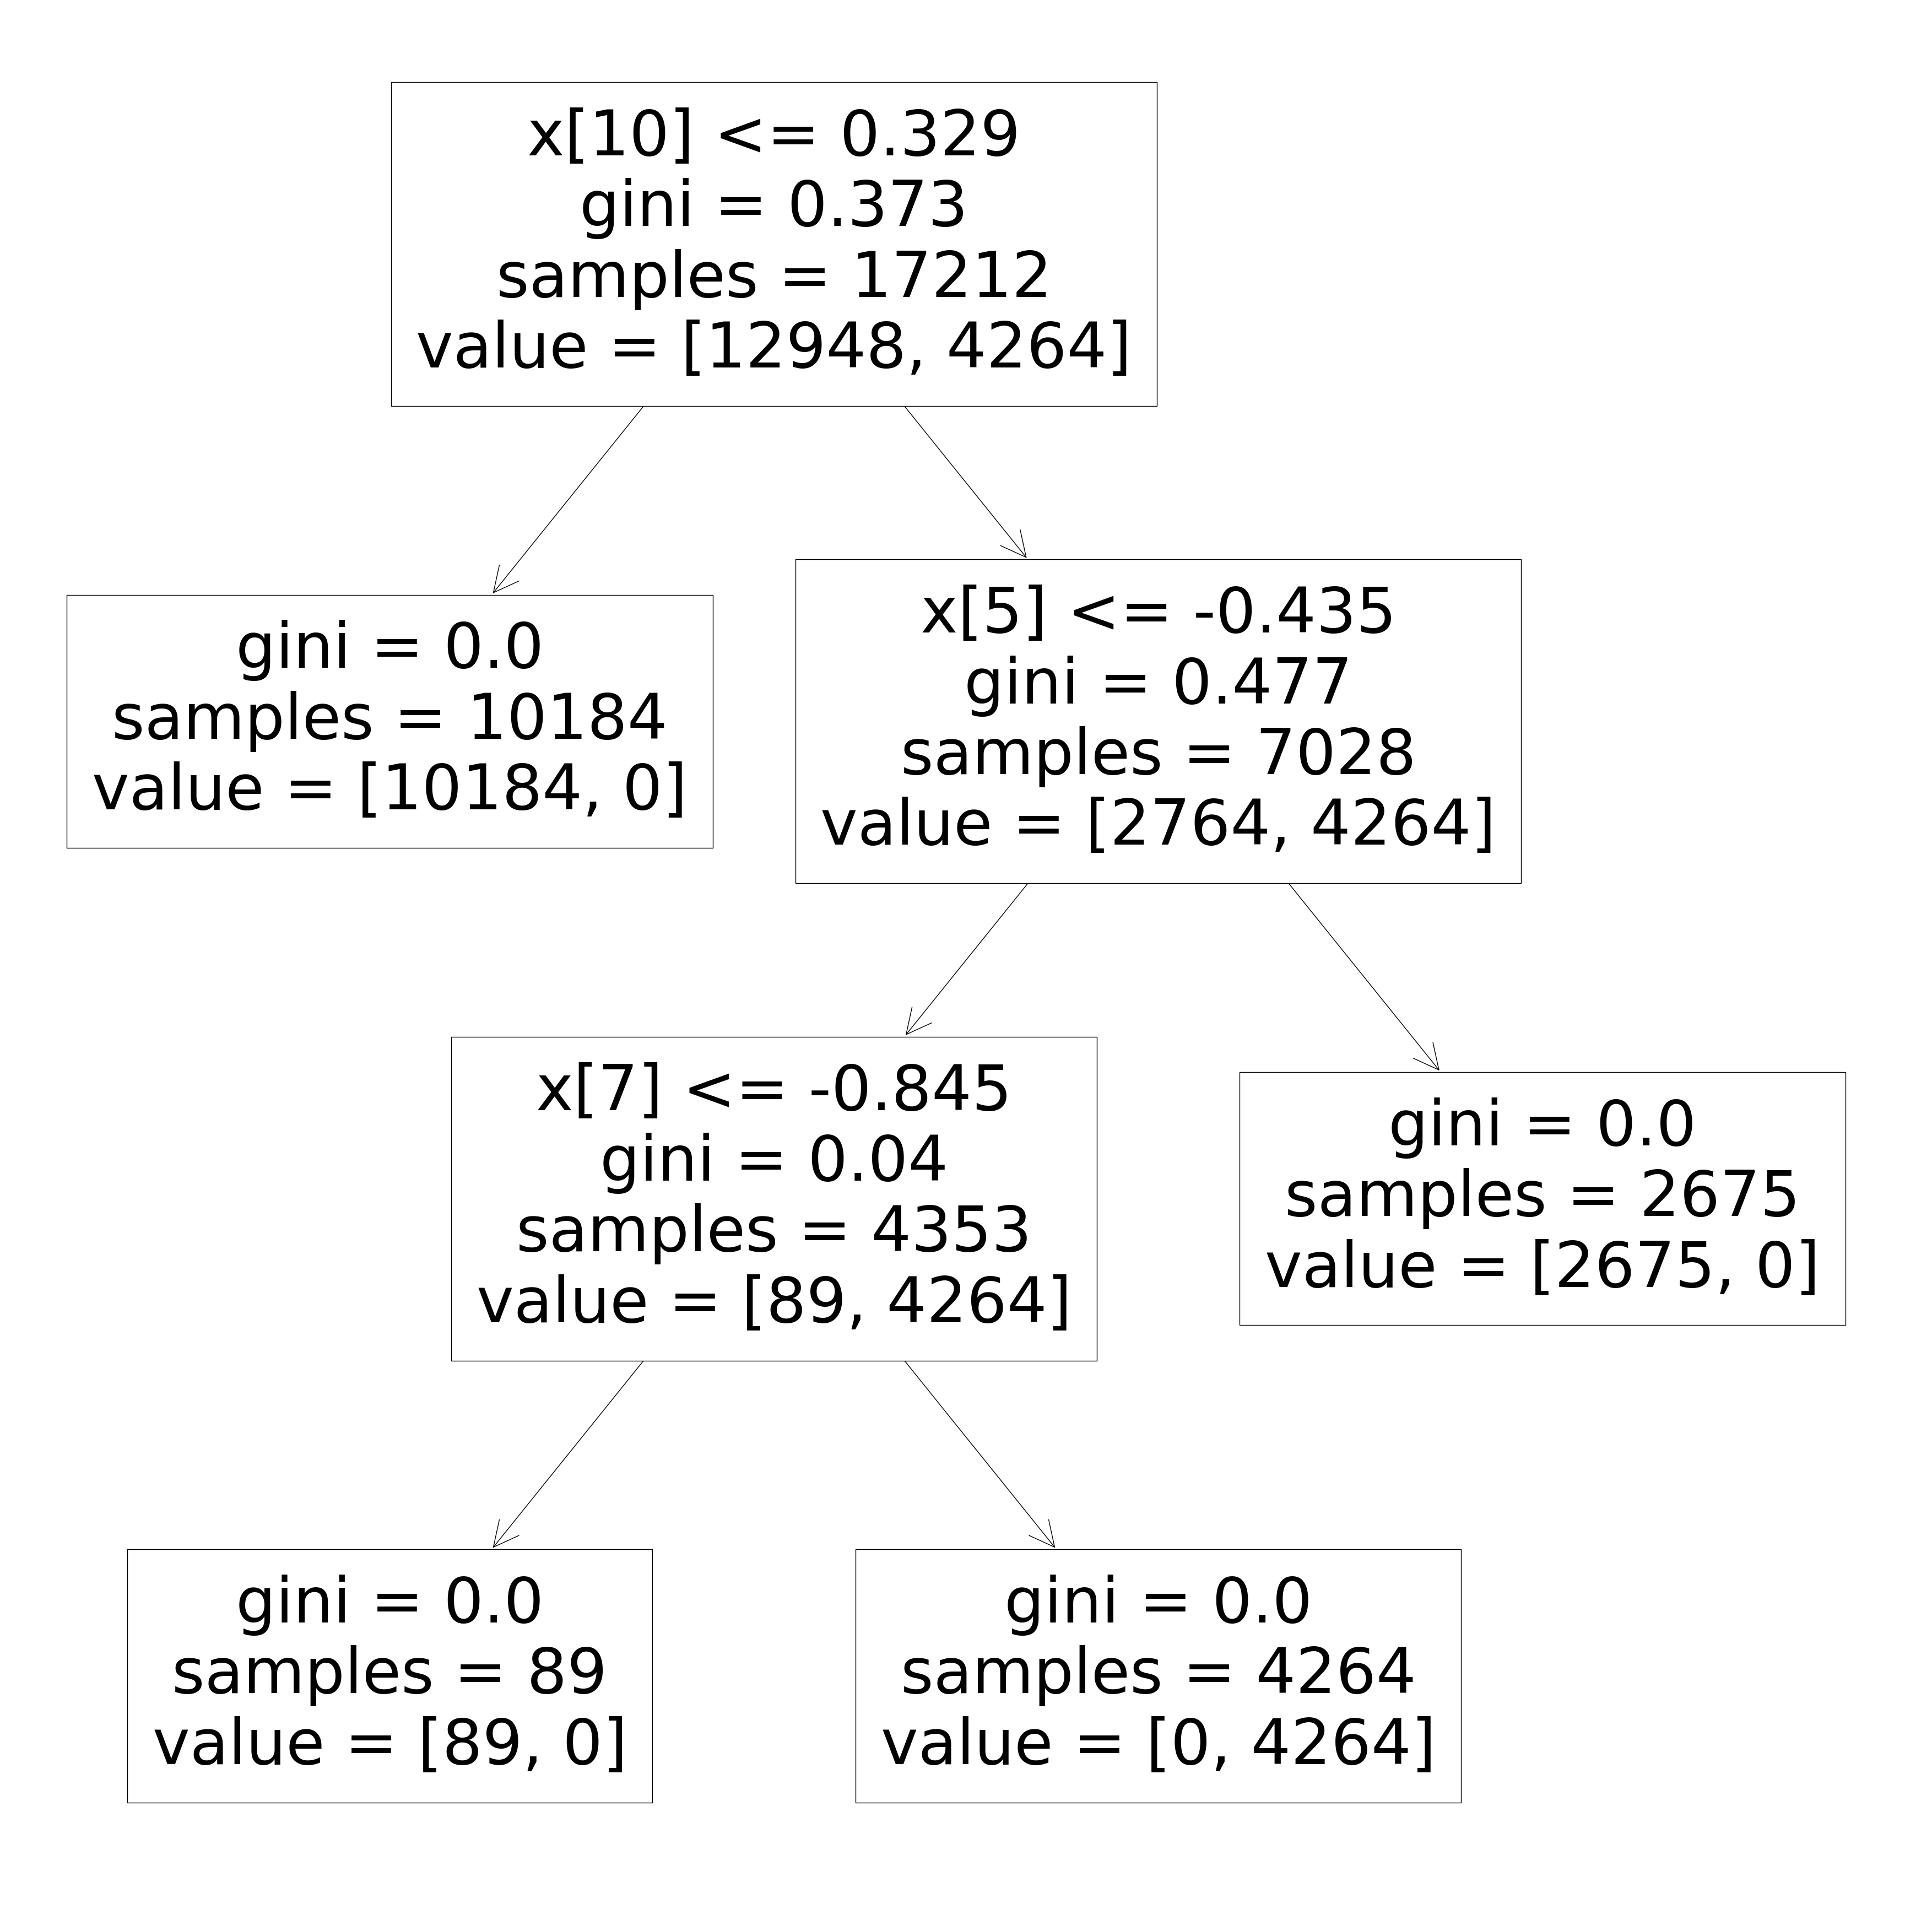

In [24]:
# Run Decision Tree classifier
weather_dt_basel = DecisionTreeClassifier(criterion='gini', min_samples_split=2, max_depth=5)
weather_dt_basel.fit(X_train, y_train)
figure(figsize=(45,45))
tree.plot_tree(weather_dt_basel)

# The resulting chart looks to have completed in 4 depths, not needing the 5th?

## Calculating the Train Accuracy Score:

In [26]:
# The accuracy score is 1.0, which is very accurate.  Looks to be a great model.
y_pred_train = weather_dt_basel.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt_basel, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  1.0


## Creating the Confusion Matrix:

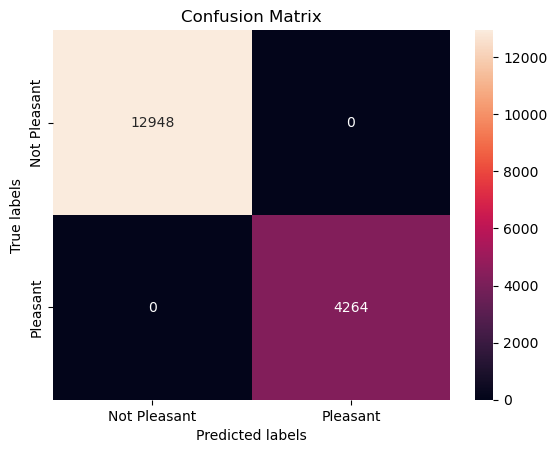

In [30]:
# Confusion matrix to see how many labels were correct or not.
labels = ['Not Pleasant','Pleasant']    

ax= plt.subplot()

cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

Overall the accuracy score is great at a 1 and the confusion matrix shows no mistakes.  Due to this, we can believe that the decision tree is a great tool to use to predict whether the day will be pleasant or not.  This model separted the weather stations due to the confusion matrix not working with 15 categories from the answers section... and the original data fram containing 147 columns as well.  The individual station locations can manually be entered or specified in a data frame to check their results.

# Running Artificial Neural Networks Model:

In [32]:
X_train[:10]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
8196,-1.417570,-0.027930,-0.619294,-0.750867,1.186458,-0.325270,-0.179228,0.535359,1.359088,1.116341,1.354285
20472,1.076130,-0.573924,0.555086,-0.215925,-0.821838,-0.265148,-0.179228,-1.065304,-1.655817,-1.458775,-1.784113
18269,0.660514,-0.846921,0.735760,-1.270525,-1.004410,-0.305229,0.817688,-0.926116,-1.655817,-1.887961,-1.646665
7713,-1.417570,-0.027930,-0.167609,0.410721,-0.585568,-0.445514,-0.179228,-0.253374,-1.601495,-1.550743,-1.486309
21958,0.660514,3.111534,-0.619294,-0.689731,-0.821838,1.919289,-0.179228,-0.949314,-0.582946,-0.692371,-0.180552
11464,0.660514,-0.983419,-1.070979,1.847422,1.583822,-0.445514,-0.179228,1.277695,1.073894,0.656499,1.033573
3984,-1.001953,-0.027930,0.374412,-0.001949,-0.811098,-0.445514,-0.179228,-0.230176,-0.908881,-1.044917,-1.005241
4752,1.076130,-0.027930,1.639129,-0.001949,-1.251420,-0.445514,-0.179228,-1.065304,-1.941011,-2.102554,-1.910107
11092,0.660514,-0.027930,0.645423,0.150892,0.670960,0.556521,-0.179228,0.210586,0.720797,0.748467,0.838855
21377,-1.417570,-1.119918,-1.341989,-0.093653,-0.005632,-0.445514,-0.179228,2.066427,1.141798,0.549202,1.251199


In [33]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749e+00 -3.09502743e-02 -6.16603153e-01 -7.46130744e-01
   1.18161475e+00 -3.21906634e-01 -1.78395780e-01  5.30475346e-01
   1.35262702e+00  1.11276341e+00  1.34868206e+00]
 [ 1.08186228e+00 -5.87893425e-01  5.57788069e-01 -2.14102475e-01
  -8.27239612e-01 -2.62135797e-01 -1.78395780e-01 -1.06970594e+00
  -1.65254457e+00 -1.45514929e+00 -1.78327480e+00]
 [ 6.66372321e-01 -8.66365000e-01  7.38463642e-01 -1.26295821e+00
  -1.00986274e+00 -3.01983022e-01  8.21457090e-01 -9.30559741e-01
  -1.65254457e+00 -1.88313474e+00 -1.64610881e+00]
 [-1.41107749e+00 -3.09502743e-02 -1.64914222e-01  4.09130639e-01
  -5.90903804e-01 -4.41448309e-01 -1.78395780e-01 -2.58019780e-01
  -1.59839734e+00 -1.54686045e+00 -1.48608182e+00]
 [ 6.66372321e-01  3.17147284e+00 -6.16603153e-01 -6.85327514e-01
  -8.27239612e-01  1.90953796e+00 -1.78395780e-01 -9.53750775e-01
  -5.83136663e-01 -6.90889555e-01 -1.83004874e-01]
 [ 6.66372321e-01 -1.00560079e+00 -1.06829209e+00  1.83800656e+00
   1.57908861e+00 -

In [34]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

In [ ]:
['BASEL_cloud_cover','BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
                   'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']

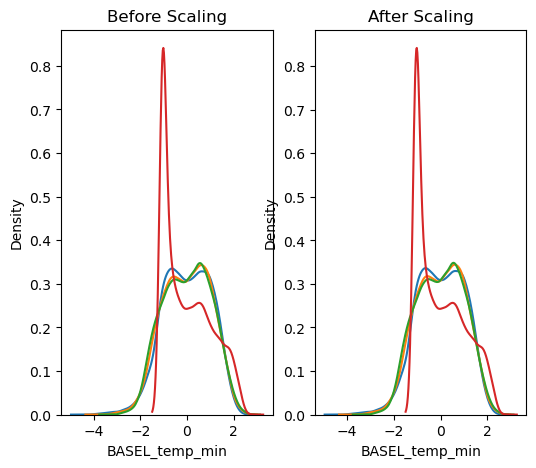

In [37]:
# So... there are 11 columns, which seems like a really bad idea to put it all
# into one chart. Instead I will do a few charts, using samples of columns.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_temp_min'], ax=ax1)
sns.kdeplot(X_train['BASEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BASEL_temp_max'], ax=ax1)
sns.kdeplot(X_train['BASEL_sunshine'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_temp_min'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_temp_max'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_sunshine'], ax=ax2)

plt.show()

# Results kinda make sense... since I am using the scaled dataset already.  If I had to guess, using scaled or unscaled data 
# will have the same results due to this step actually scaling the data.

In [38]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

C:\Users\steve\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [39]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.9933767139205205
0.9939003136981527


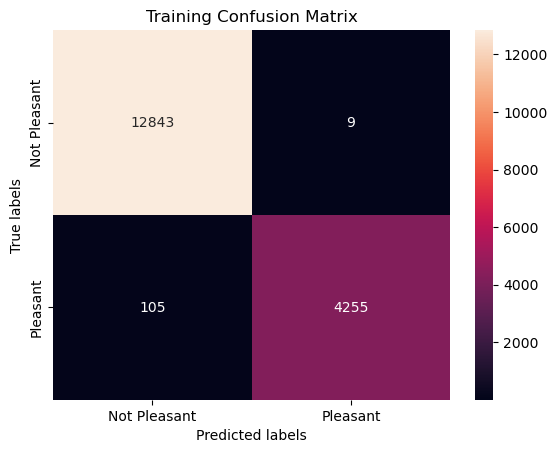

In [41]:
# Confusion matrix to see how many labels were correct or not.
labels = ['Not Pleasant','Pleasant']    

ax= plt.subplot()

#Confusion matrix for training data
cm = confusion_matrix(y_pred, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

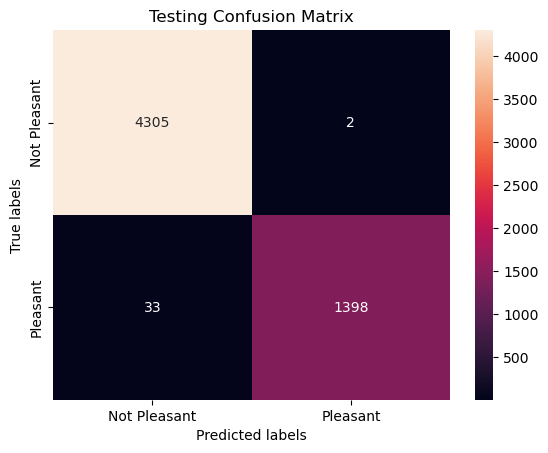

In [42]:
ax= plt.subplot()

#Confusion matrix for testing data
cm = confusion_matrix(y_pred_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Testing Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

The results looks accurate "enough", but the example file had us up the hidden layer sizes for the ANN.  I want to try that as well and see if there are any actual notable improvements from doing so.  Going to stick with the examples increase of 10, 5 vs the previous setting of 5, 5.

# Running 2nd Artificial Neural Networks Model:

In [43]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

C:\Users\steve\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [44]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.9989542179874507
0.9980829557337051


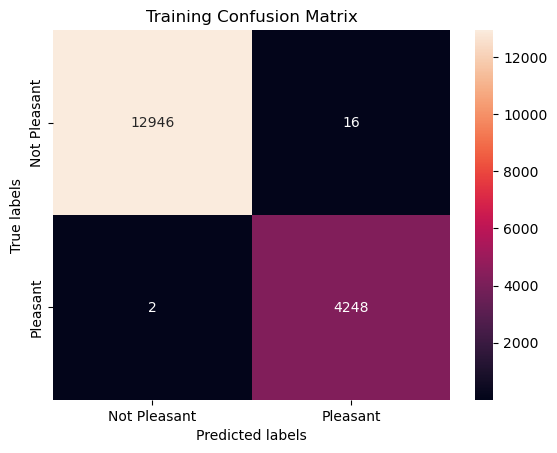

In [45]:
ax= plt.subplot()

#Confusion matrix for training data
cm = confusion_matrix(y_pred, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

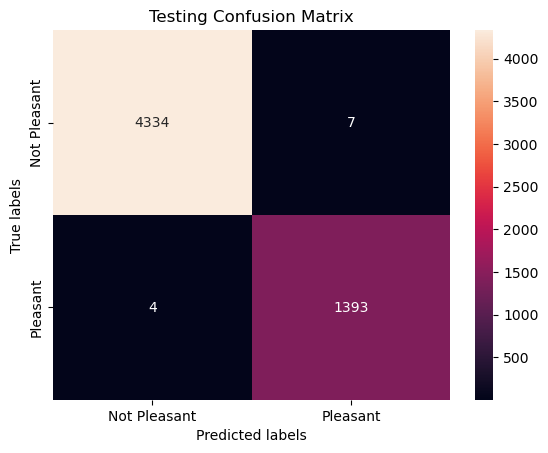

In [46]:
ax= plt.subplot()

#Confusion matrix for testing data
cm = confusion_matrix(y_pred_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Testing Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

It did improve, very VERY slightly, but an improvement nontheless. 

# Running ANN for Second Weather Station:

In [47]:
# Keeping only columns for a specific weather station, creating a df for that specific station.
columns_to_keep3 = ['BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation',
                   'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max']
df_budapest = df[columns_to_keep3]
df_budapest

,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max
0,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839
1,-0.25524,-0.010098,-0.005876,-1.415938,0.371622,-1.344065,-1.110927,-0.878727,-1.341204
2,-0.25524,-0.010098,-0.005876,-1.278676,-0.344984,-1.195190,-1.063873,-0.838610,-1.116403
3,-0.25524,-0.010098,-0.005876,-1.404499,-0.344984,-1.344065,-1.146217,-1.012452,-1.208367
4,-0.25524,-0.010098,-0.005876,-1.404499,-0.344984,-1.344065,-1.087400,-0.918844,-1.116403
...,...,...,...,...,...,...,...,...,...
22945,-0.25524,-0.010098,-0.005876,-0.009004,-0.021356,-0.004191,-0.005167,-0.009517,-0.002613
22946,-0.25524,-0.010098,-0.005876,-0.009004,-0.021356,-0.004191,-0.005167,-0.009517,-0.002613
22947,-0.25524,-0.010098,-0.005876,-0.009004,-0.021356,-0.004191,-0.005167,-0.009517,-0.002613
22948,-0.25524,-0.010098,-0.005876,-0.009004,-0.021356,-0.004191,-0.005167,-0.009517,-0.002613


In [48]:
# Creating a df containing answers only for a specific station.
columns_to_keep4 = ['BUDAPEST_pleasant_weather']
df_answers_budapest = df_answers[columns_to_keep4]
df_answers_budapest

,BUDAPEST_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [49]:
X = df_budapest
y = df_answers_budapest

In [50]:
print(X.shape)
print(y.shape)

(22950, 9)
(22950, 1)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 9)
(5738, 9)
(17212, 1)
(5738, 1)


In [53]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

C:\Users\steve\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [54]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.9995933069951197
0.9994771697455559


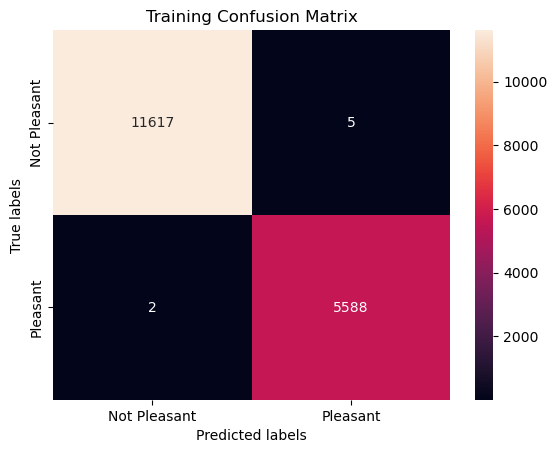

In [55]:
# Confusion matrix to see how many labels were correct or not.
labels = ['Not Pleasant','Pleasant']    

ax= plt.subplot()

#Confusion matrix for training data
cm = confusion_matrix(y_pred, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Running ANN on Third Weather Station:

In [57]:
# Keeping only columns for a specific weather station, creating a df for that specific station.
columns_to_keep5 = ['DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation',
                   'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max']
df_debilt = df[columns_to_keep5]
df_debilt

,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max
0,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047
1,1.176060,0.446070,0.866945,-0.987868,-1.118559,-0.367169,-1.052820,-0.367511,0.090631,-0.781002
2,0.251504,-0.202616,1.070588,0.123041,-0.961650,-0.476850,-0.342557,-0.509912,-0.220221,-0.561770
3,1.176060,1.483968,1.376051,1.142224,-1.185805,-0.301361,-1.077312,-0.525734,-0.392916,-0.534366
4,0.251504,2.132654,0.866945,0.918004,-1.230636,0.356726,-1.077312,-0.320045,-0.600150,-0.383643
...,...,...,...,...,...,...,...,...,...,...
22945,1.176060,-0.267485,0.256017,0.377837,-0.008989,-0.016190,-0.391540,0.898267,1.195880,0.739922
22946,1.176060,-0.332353,0.256017,0.245343,-0.008989,-0.016190,-0.220098,0.945734,0.764142,0.890644
22947,1.176060,-0.786434,0.459660,0.214768,-0.008989,-0.016190,-0.269081,0.914089,0.591447,0.972857
22948,1.176060,-1.045908,0.561481,0.214768,-0.008989,-0.016190,0.392198,0.692578,0.764142,0.849538


In [58]:
# Creating a df containing answers only for a specific station.
columns_to_keep6 = ['DEBILT_pleasant_weather']
df_answers_debilt = df_answers[columns_to_keep6]
df_answers_debilt

,DEBILT_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [59]:
X = df_debilt
y = df_answers_debilt

In [60]:
print(X.shape)
print(y.shape)

(22950, 10)
(22950, 1)


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 10)
(5738, 10)
(17212, 1)
(5738, 1)


In [63]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

C:\Users\steve\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [64]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.9998838019986056
0.9994771697455559


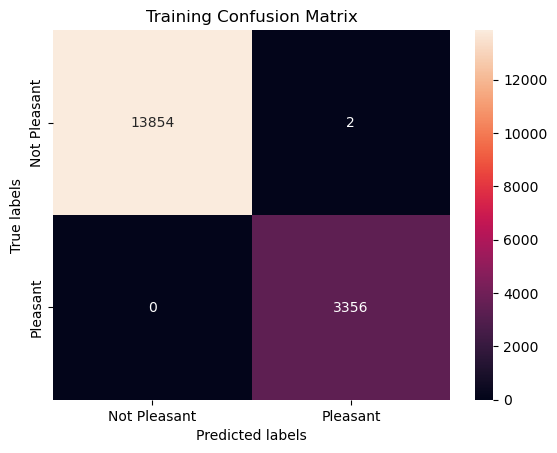

In [65]:
# Confusion matrix to see how many labels were correct or not.
labels = ['Not Pleasant','Pleasant']    

ax= plt.subplot()

#Confusion matrix for training data
cm = confusion_matrix(y_pred, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);